In [614]:
import requests
import json
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# API Key 

In [77]:
api_key = ""
headers = {
    "apikey": api_key
}


# first API 

In [82]:

postal_codes = ["10001", "10002", "10003", "90001", "82009"]

base_url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/detail"

all_properties = []

for code in postal_codes:
    for page in range(1, 10): 
        params = {
            "postalcode": code,
            "page": page,
            "pagesize": 100  
        }

        response = requests.get(base_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            properties = data.get("property", [])
            if not properties:
                break  # No more data
            all_properties.extend(properties)
            print(f" Retrieved page {page} for ZIP {code}")
            time.sleep(1.2) 
        else:
            print(f" Failed for ZIP {code} page {page}: {response.status_code}")
            break


 Retrieved page 1 for ZIP 10001
 Retrieved page 2 for ZIP 10001
 Retrieved page 3 for ZIP 10001
 Retrieved page 4 for ZIP 10001
 Retrieved page 5 for ZIP 10001
 Retrieved page 6 for ZIP 10001
 Retrieved page 7 for ZIP 10001
 Retrieved page 8 for ZIP 10001
 Retrieved page 9 for ZIP 10001
 Retrieved page 1 for ZIP 10002
 Retrieved page 2 for ZIP 10002
 Retrieved page 3 for ZIP 10002
 Retrieved page 4 for ZIP 10002
 Retrieved page 5 for ZIP 10002
 Retrieved page 6 for ZIP 10002
 Retrieved page 7 for ZIP 10002
 Retrieved page 8 for ZIP 10002
 Retrieved page 9 for ZIP 10002
 Retrieved page 1 for ZIP 10003
 Retrieved page 2 for ZIP 10003
 Retrieved page 3 for ZIP 10003
 Retrieved page 4 for ZIP 10003
 Retrieved page 5 for ZIP 10003
 Retrieved page 6 for ZIP 10003
 Retrieved page 7 for ZIP 10003
 Retrieved page 8 for ZIP 10003
 Retrieved page 9 for ZIP 10003
 Retrieved page 1 for ZIP 90001
 Retrieved page 2 for ZIP 90001
 Retrieved page 3 for ZIP 90001
 Retrieved page 4 for ZIP 90001
 Retriev

In [83]:
# Save JSON
with open("attom_raw_data.json", "w") as f:
    json.dump(all_properties, f, indent=2)

# Flatten and save CSV
df2 = pd.json_normalize(all_properties)
df2.to_csv("attom_raw_data2.csv", index=False)
print(df2.shape)

(4500, 99)


In [84]:
df2

,identifier.Id,identifier.fips,identifier.apn,identifier.attomId,lot.lotnum,lot.pooltype,area.blockNum,area.loctype,area.countrysecsubd,area.countyuse1,...,building.interior.bsmttype,building.interior.fplccount,building.interior.fplcind,building.interior.fplctype,building.construction.condition,building.construction.roofcover,building.construction.roofShape,building.construction.wallType,building.summary.bldgsNum,building.rooms.bathspartial
0,30267,36061,00754-1004,30267,1004,NO POOL,754,VIEW - NONE,New York,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,398087,36061,00779-0045,398087,45,NO POOL,779,VIEW - NONE,New York,K4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1395391,36061,00804-0017,1395391,17,NO POOL,804,VIEW - NONE,New York,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1395418,36061,00753-0016,1395418,16,NO POOL,753,VIEW - NONE,New York,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1528817,36061,00802-0077,1528817,77,NO POOL,802,VIEW - NONE,New York,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,17867111,56021,14882000300192,17867111,"19,20",NO POOL,3,VIEW - NONE,Laramie,100,...,FINISHED,1.0,Y,YES,AVERAGE,COMPOSITION SHINGLE,GABLE,WOOD,1.0,NaN
4496,17867112,56021,14886000400040,17867112,"4,5",NaN,4,VIEW - NONE,Laramie,100,...,FINISHED,1.0,Y,YES,AVERAGE,COMPOSITION SHINGLE,GABLE,WOOD,1.0,NaN
4497,17867113,56021,14755001600000,17867113,NaN,NO POOL,NaN,VIEW - NONE,Laramie,100,...,FINISHED,NaN,NaN,NaN,AVERAGE,COMPOSITION SHINGLE,HIP,WOOD,1.0,1.0
4498,17867114,56021,14755001800000,17867114,NaN,NO POOL,NaN,VIEW - NONE,Laramie,100,...,FINISHED,NaN,NaN,NaN,AVERAGE,COMPOSITION SHINGLE,GABLE,WOOD,1.0,NaN


In [85]:
df2.columns

Index(['identifier.Id', 'identifier.fips', 'identifier.apn',
       'identifier.attomId', 'lot.lotnum', 'lot.pooltype', 'area.blockNum',
       'area.loctype', 'area.countrysecsubd', 'area.countyuse1',
       'area.muncode', 'area.munname', 'area.srvySection', 'area.srvyTownship',
       'area.subdname', 'area.taxcodearea', 'address.country',
       'address.countrySubd', 'address.line1', 'address.line2',
       'address.locality', 'address.matchCode', 'address.oneLine',
       'address.postal1', 'address.postal2', 'address.postal3',
       'location.accuracy', 'location.latitude', 'location.longitude',
       'location.distance', 'location.geoid', 'location.geoIdV4.CO',
       'location.geoIdV4.CS', 'location.geoIdV4.DB', 'location.geoIdV4.N1',
       'location.geoIdV4.N2', 'location.geoIdV4.PL', 'location.geoIdV4.SB',
       'location.geoIdV4.ZI', 'summary.absenteeInd', 'summary.propclass',
       'summary.propsubtype', 'summary.proptype', 'summary.propertyType',
       'summary.year

## view the columes to understand data more and take only wat we need 

In [149]:
df2["address.locality"].unique() 

array(['NEW YORK', 'LOS ANGELES', 'CHEYENNE'], dtype=object)

In [150]:
df2["address.countrySubd"].unique() # i think this will be good 

array(['NY', 'CA', 'WY'], dtype=object)

In [151]:
df2["summary.propertyType"].unique() # so many values 

array(['CONDOMINIUM', 'STORES & APARTMENTS',
       'RESIDENTIAL INCOME (GENERAL/MULTI-FAMILY)',
       'BOARDING/ROOMING HOUSE, APT HOTEL', 'STORE/OFFICE (MIXED USE)',
       'SINGLE FAMILY RESIDENCE', 'OFFICE BUILDING (MULTI-STORY)',
       'HOTEL', 'TRIPLEX (3 UNITS, ANY COMBINATION)', 'COOPERATIVE',
       'COMMERCIAL OFFICE/RESIDENTIAL (MIXED USE)',
       'Cooperative Building (Residential)',
       'DUPLEX (2 UNITS, ANY COMBINATION)', 'COMMERCIAL OFFICE (GENERAL)',
       'PARKING LOT', 'VACANT LAND', 'APARTMENT HOUSE (5+ UNITS)',
       'THEATER (MOVIE)',
       'LIGHT INDUSTRIAL (10% IMPROVED OFFICE SPACE; MACHINE SHOP)',
       'FINANCIAL BUILDING', 'Condominium Building (Residential)',
       'MISCELLANEOUS (GENERAL)',
       'RETAIL STORES (PERSONAL SERVICES, PHOTOGRAPHY, TRAVEL)',
       'GOVERNMENTAL / PUBLIC USE (GENERAL)', 'FREEWAYS, STATE HWYS',
       'PARKING GARAGE, PARKING STRUCTURE', 'COMMERCIAL (GENERAL)',
       'QUADPLEX (4 UNITS, ANY COMBINATION)', 'WAREHOUSE,

In [112]:
df2["summary.proptype"].unique()

array(['CONDOMINIUM', 'STORES & RESIDENTIAL', 'MULTI FAMILY DWELLING',
       'APARTMENT/HOTEL', 'STORES & OFFICES', 'SFR', 'OFFICE BUILDING',
       'HOTEL', 'TRIPLEX', 'COOPERATIVE', 'OFFICE & RESIDENTIAL',
       'Cooperative Building', 'DUPLEX', 'OFFICE & SHOWROOM',
       'PARKING LOT', 'VACANT LAND (NEC)', 'APARTMENT', 'THEATER',
       'LIGHT INDUSTRIAL', 'FINANCIAL BUILDING', 'Condominium Building',
       'MISC IMPROVEMENTS', 'RETAIL TRADE', 'PUBLIC (NEC)',
       'TRANSPORT (NEC)', 'PARKING STRUCTURE', 'COMMERCIAL (NEC)',
       'QUADRUPLEX', 'WAREHOUSE', 'INDUSTRIAL CONDOMINIUM', 'AUTO REPAIR',
       'PARK', 'RELIGIOUS', 'LIBRARY/MUSEUM', 'MISC COMMERCIAL SERVICES',
       'ORPHANAGE', 'RESORT HOTEL', 'SEC EDUCATIONAL SCHOOL',
       'TOWNHOUSE/ROWHOUSE', 'TAX EXEMPT', 'MEDICAL BUILDING',
       'POLICE/FIRE/CIVIL DEFENSE', 'UNIVERSITY',
       'VOCATIONAL/TRADE SCHOOL', 'RESIDENCE HALL/DORMITORIES',
       'RESTAURANT BUILDING', 'Single Family Residence w/ ADU',
       'RE

In [148]:

df2["summary.propclass"].unique() # i think tis is the best 

array(['Condominium (residential)', 'Apartment', 'Hotel, Motel',
       'Commercial', 'Single Family Residence / Townhouse',
       'Office Building', 'Duplex, Triplex, Quadplex', nan, 'Parking',
       'Vacant', 'Amusement-Recreation', 'Industrial Light',
       'Financial Institution', 'Retail', 'Exempt', 'Transport',
       'Industrial', 'Service (general public)',
       'Hospital (medical complex, clinic)'], dtype=object)

In [114]:
df2["summary.propsubtype"].unique()

array(['Residential', 'Commercial', 'COMMERCIAL', 'VACANT LAND',
       'INDUSTRIAL', 'OTHER / UNKNOWN', 'PUBLIC WORKS'], dtype=object)

In [117]:
	
df2["building.summary.view"].unique() # i think this will effect the price 

array(['VIEW - NONE'], dtype=object)

In [142]:

df2["building.size.livingsize"].unique()#we will ned this 

array([ 936., 7424., 6765., ..., 1542., 1444., 1422.], shape=(1937,))

In [143]:

df2["building.rooms.bathstotal"].unique()#i will see about this 

array([nan,  1.,  2.,  3.,  5.,  6.,  4.,  8., 19., 10.,  7., 11., 16.])

In [173]:
df2["building.rooms.beds"].unique()# i defintly taking this 

array([nan,  3.,  5.,  2.,  6.,  9.,  7., 10.,  4.,  1.,  8., 12., 15.,
       11.])

In [145]:
df2["building.rooms.bathsfull"].unique() 

array([nan,  1.,  2.,  3.,  5.,  6.,  4.,  8., 19., 10.,  7., 11.])

In [126]:
df2["building.construction.condition"].unique()

array([nan, 'AVERAGE', 'GOOD', 'FAIR'], dtype=object)

In [128]:
df2["building.construction.frameType"].unique()

array([nan, 'WOOD', 'CONCRETE', 'MASONRY'], dtype=object)

In [132]:
df2["building.parking.prkgSpaces"].unique()

array([nan, '79', '36', '147', '18', '78', '109', '21', '126', '9', '68',
       '16', '2', '5', '3', '1', '4', '8', '7', '6', '11', '20', '10',
       '12'], dtype=object)

In [146]:
df2["lot.pooltype"].unique() #i think this will effect the price 

array(['NO POOL', nan, 'SPA/HOT TUB (ONLY)', 'INDOOR POOL'], dtype=object)

In [147]:
df2["building.summary.quality"].unique() # i am taking this 

array([nan, 'AVERAGE', 'GOOD', 'FAIR', 'VERY GOOD', 'LOW'], dtype=object)

In [138]:
df2["building.summary.levels"].unique()

array([ 3.,  4.,  5.,  2.,  6., 35., nan, 20., 10.,  1., 19., 21., 16.,
       22.,  7., 13., 14., 41.,  8., 12., 18., 25., 11.,  9., 59., 36.,
       24., 32., 40., 33., 34., 58., 56., 66., 17., 15., 27.])

## final Data set from frist API

In [269]:
# list of all the columns i need 
df2_col=["identifier.Id","address.countrySubd","summary.propclass","building.size.livingsize","building.rooms.bathstotal",
         "building.rooms.beds","building.parking.prkgSpaces","lot.pooltype","building.summary.quality"]

df2_M = df2[df2_col].rename(columns={"identifier.Id": "id","address.countrySubd": "state",
    "summary.propclass": "property_class",
    "building.size.livingsize": "living_size",
    "building.rooms.bathstotal": "bathrooms",
    "building.rooms.beds": "total_rooms",
    "building.parking.prkgSpaces": "parking_spaces",
    "lot.pooltype": "pool_type",
    "building.summary.quality": "quality" })

In [270]:
df2_M

,id,state,property_class,living_size,bathrooms,total_rooms,parking_spaces,pool_type,quality
0,30267,NY,Condominium (residential),936.0,NaN,NaN,NaN,NO POOL,NaN
1,398087,NY,Apartment,7424.0,NaN,NaN,NaN,NO POOL,NaN
2,1395391,NY,Apartment,6765.0,NaN,NaN,NaN,NO POOL,NaN
3,1395418,NY,"Hotel, Motel",6578.0,NaN,NaN,NaN,NO POOL,NaN
4,1528817,NY,Commercial,3366.0,NaN,NaN,NaN,NO POOL,NaN
...,...,...,...,...,...,...,...,...,...
4495,17867111,WY,Single Family Residence / Townhouse,1747.0,3.0,NaN,2,NO POOL,AVERAGE
4496,17867112,WY,Single Family Residence / Townhouse,1800.0,3.0,NaN,2,NaN,FAIR
4497,17867113,WY,Single Family Residence / Townhouse,1560.0,3.0,3.0,3,NO POOL,FAIR
4498,17867114,WY,Single Family Residence / Townhouse,1246.0,3.0,NaN,3,NO POOL,AVERAGE


In [271]:
df2_M. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4500 non-null   int64  
 1   state           4500 non-null   object 
 2   property_class  4463 non-null   object 
 3   living_size     3599 non-null   float64
 4   bathrooms       1739 non-null   float64
 5   total_rooms     850 non-null    float64
 6   parking_spaces  859 non-null    object 
 7   pool_type       4304 non-null   object 
 8   quality         1509 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 316.5+ KB


# second API /sale/detail

In [ ]:

postal_codes = ["10001", "10002", "10003", "90001", "82009"]

base_url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/detail"

all_properties = []

for code in postal_codes:
    for page in range(1, 10): 
        params = {
            "postalcode": code,
            "page": page,
            "pagesize": 100  
        }

        response = requests.get(base_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            properties = data.get("property", [])
            if not properties:
                break  # No more data
            all_properties.extend(properties)
            print(f" Retrieved page {page} for ZIP {code}")
            time.sleep(1.2) 
        else:
            print(f" Failed for ZIP {code} page {page}: {response.status_code}")
            break


In [ ]:
# Save JSON
with open("attom_raw_data.json", "w") as f:
    json.dump(all_properties, f, indent=2)

# Flatten and save CSV
df3 = pd.json_normalize(all_properties)
df3.to_csv("attom_raw_data3.csv", index=False)
print(df3.shape)

In [182]:
list(df3.columns)

['identifier.Id',
 'identifier.fips',
 'identifier.apn',
 'identifier.attomId',
 'lot.lotnum',
 'lot.pooltype',
 'area.blockNum',
 'area.loctype',
 'area.countrysecsubd',
 'area.countyuse1',
 'area.muncode',
 'area.munname',
 'area.srvySection',
 'area.srvyTownship',
 'area.subdname',
 'area.taxcodearea',
 'address.country',
 'address.countrySubd',
 'address.line1',
 'address.line2',
 'address.locality',
 'address.matchCode',
 'address.oneLine',
 'address.postal1',
 'address.postal2',
 'address.postal3',
 'location.accuracy',
 'location.latitude',
 'location.longitude',
 'location.distance',
 'location.geoid',
 'location.geoIdV4.CO',
 'location.geoIdV4.CS',
 'location.geoIdV4.DB',
 'location.geoIdV4.N1',
 'location.geoIdV4.N2',
 'location.geoIdV4.PL',
 'location.geoIdV4.SB',
 'location.geoIdV4.ZI',
 'summary.absenteeInd',
 'summary.propclass',
 'summary.propsubtype',
 'summary.proptype',
 'summary.propertyType',
 'summary.yearbuilt',
 'summary.propLandUse',
 'summary.propIndicator',
 '

In [136]:
df3["sale.amount.saleamt"].unique()

array([ 950000.,      nan, 2600000., ...,  554625.,  220669.,  235443.],
      shape=(1661,))

## final data set for the seconed API

In [163]:
df3_columns = ['identifier.Id',"sale.amount.saleamt"]
df3_M= df3[df3_columns].rename(columns={"identifier.Id": "id", "sale.amount.saleamt": "sale_price"})

In [164]:
df3_M

,id,sale_price
0,30267,950000.0
1,398087,NaN
2,1395391,2600000.0
3,1395418,NaN
4,1528817,NaN
...,...,...
4442,17867111,256075.0
4443,17867112,554625.0
4444,17867113,220669.0
4445,17867114,285000.0


# Marge two APIs togther 

In [530]:
df_merged = pd.merge(df2_M, df3_M, on="id", how="inner")

In [531]:
df_merged

,id,state,property_class,living_size,bathrooms,total_rooms,parking_spaces,pool_type,quality,sale_price
0,30267,NY,Condominium (residential),936.0,NaN,NaN,NaN,NO POOL,NaN,950000.0
1,398087,NY,Apartment,7424.0,NaN,NaN,NaN,NO POOL,NaN,NaN
2,1395391,NY,Apartment,6765.0,NaN,NaN,NaN,NO POOL,NaN,2600000.0
3,1395418,NY,"Hotel, Motel",6578.0,NaN,NaN,NaN,NO POOL,NaN,NaN
4,1528817,NY,Commercial,3366.0,NaN,NaN,NaN,NO POOL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4442,17867111,WY,Single Family Residence / Townhouse,1747.0,3.0,NaN,2,NO POOL,AVERAGE,256075.0
4443,17867112,WY,Single Family Residence / Townhouse,1800.0,3.0,NaN,2,NaN,FAIR,554625.0
4444,17867113,WY,Single Family Residence / Townhouse,1560.0,3.0,3.0,3,NO POOL,FAIR,220669.0
4445,17867114,WY,Single Family Residence / Townhouse,1246.0,3.0,NaN,3,NO POOL,AVERAGE,285000.0


# Data Description

In [532]:
print("Data Types and Non-Null Counts:")
print(df_merged.info())

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447 entries, 0 to 4446
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4447 non-null   int64  
 1   state           4447 non-null   object 
 2   property_class  4410 non-null   object 
 3   living_size     3548 non-null   float64
 4   bathrooms       1688 non-null   float64
 5   total_rooms     850 non-null    float64
 6   parking_spaces  814 non-null    object 
 7   pool_type       4266 non-null   object 
 8   quality         1458 non-null   object 
 9   sale_price      3509 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 347.6+ KB
None


In [533]:
print("\nStatistical Summary of Numeric Features:")
print(df_merged.describe())


Statistical Summary of Numeric Features:
                 id   living_size    bathrooms  total_rooms    sale_price
count  4.447000e+03  3.548000e+03  1688.000000   850.000000  3.509000e+03
mean   2.800695e+07  6.673271e+03     2.402251     3.611765  2.256480e+06
std    3.387960e+07  6.477949e+04     1.266941     1.890987  1.236107e+07
min    7.960000e+02  1.440000e+02     1.000000     1.000000  1.000000e+03
25%    7.030916e+06  9.880000e+02     2.000000     2.000000  2.999380e+05
50%    2.664963e+07  1.504000e+03     2.000000     3.000000  5.479910e+05
75%    3.298769e+07  2.779250e+03     3.000000     4.000000  1.272500e+06
max    1.682992e+08  2.521850e+06    19.000000    15.000000  3.963951e+08


In [534]:
print("\nMissing Values:")
print(df_merged.isnull().sum())
# i acn see that parking_spaces has alot od nul values drop the columne will be the best 


Missing Values:
id                   0
state                0
property_class      37
living_size        899
bathrooms         2759
total_rooms       3597
parking_spaces    3633
pool_type          181
quality           2989
sale_price         938
dtype: int64


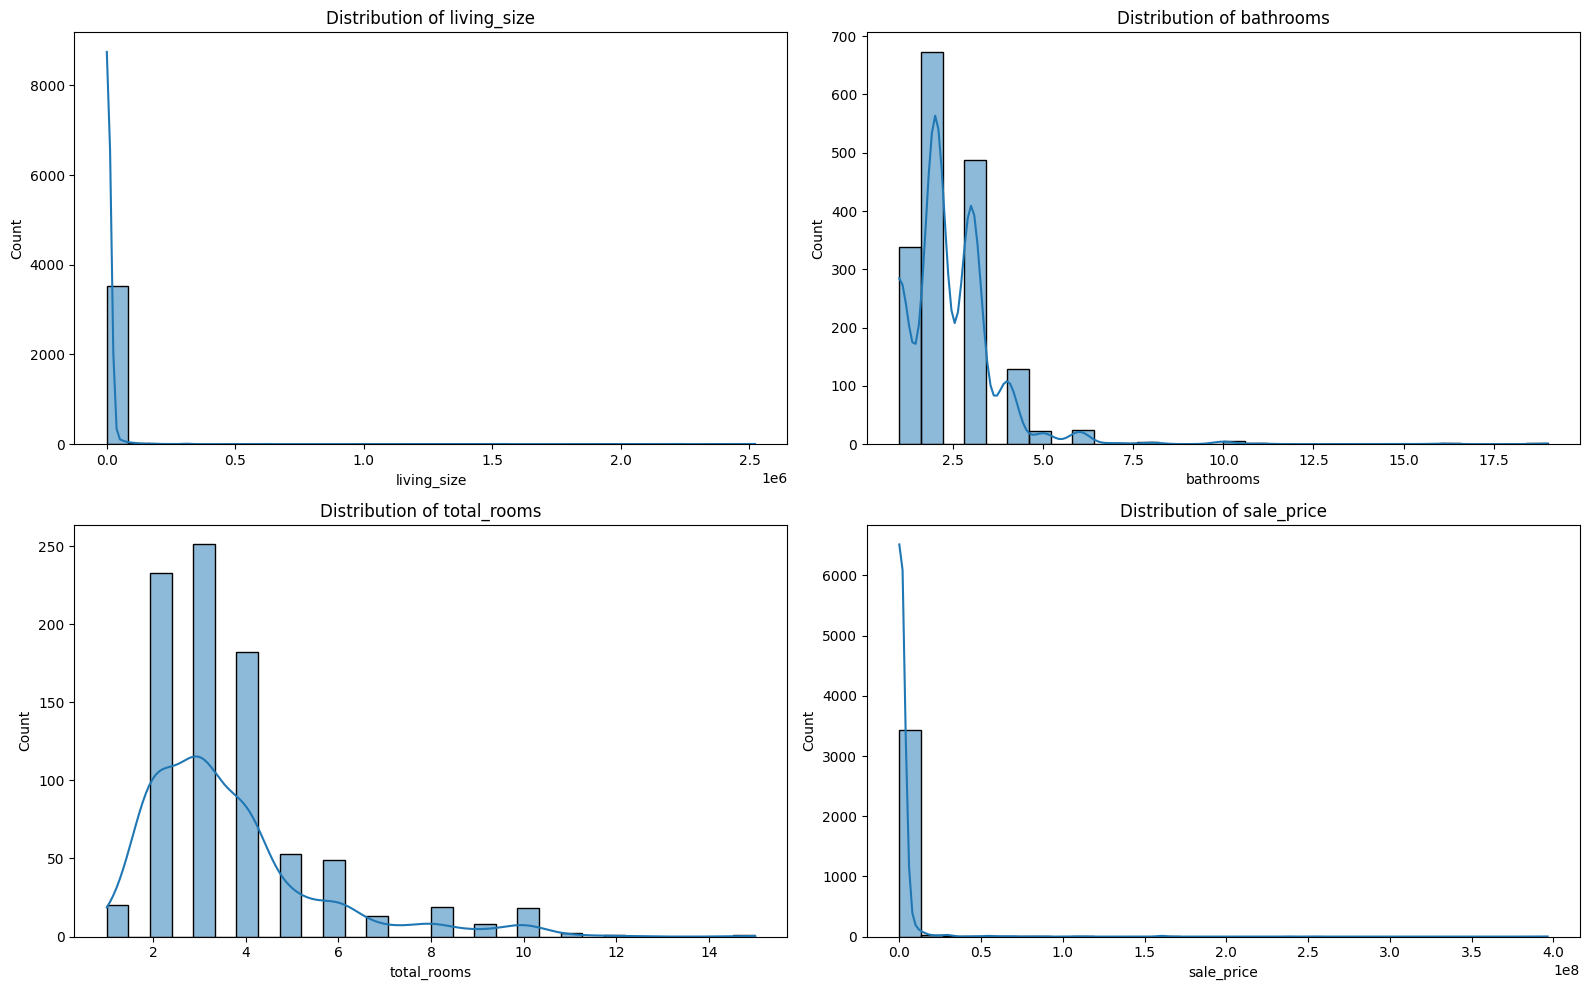

In [639]:
num_cols = ['living_size', 'bathrooms', 'total_rooms', 'sale_price']

plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_merged[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

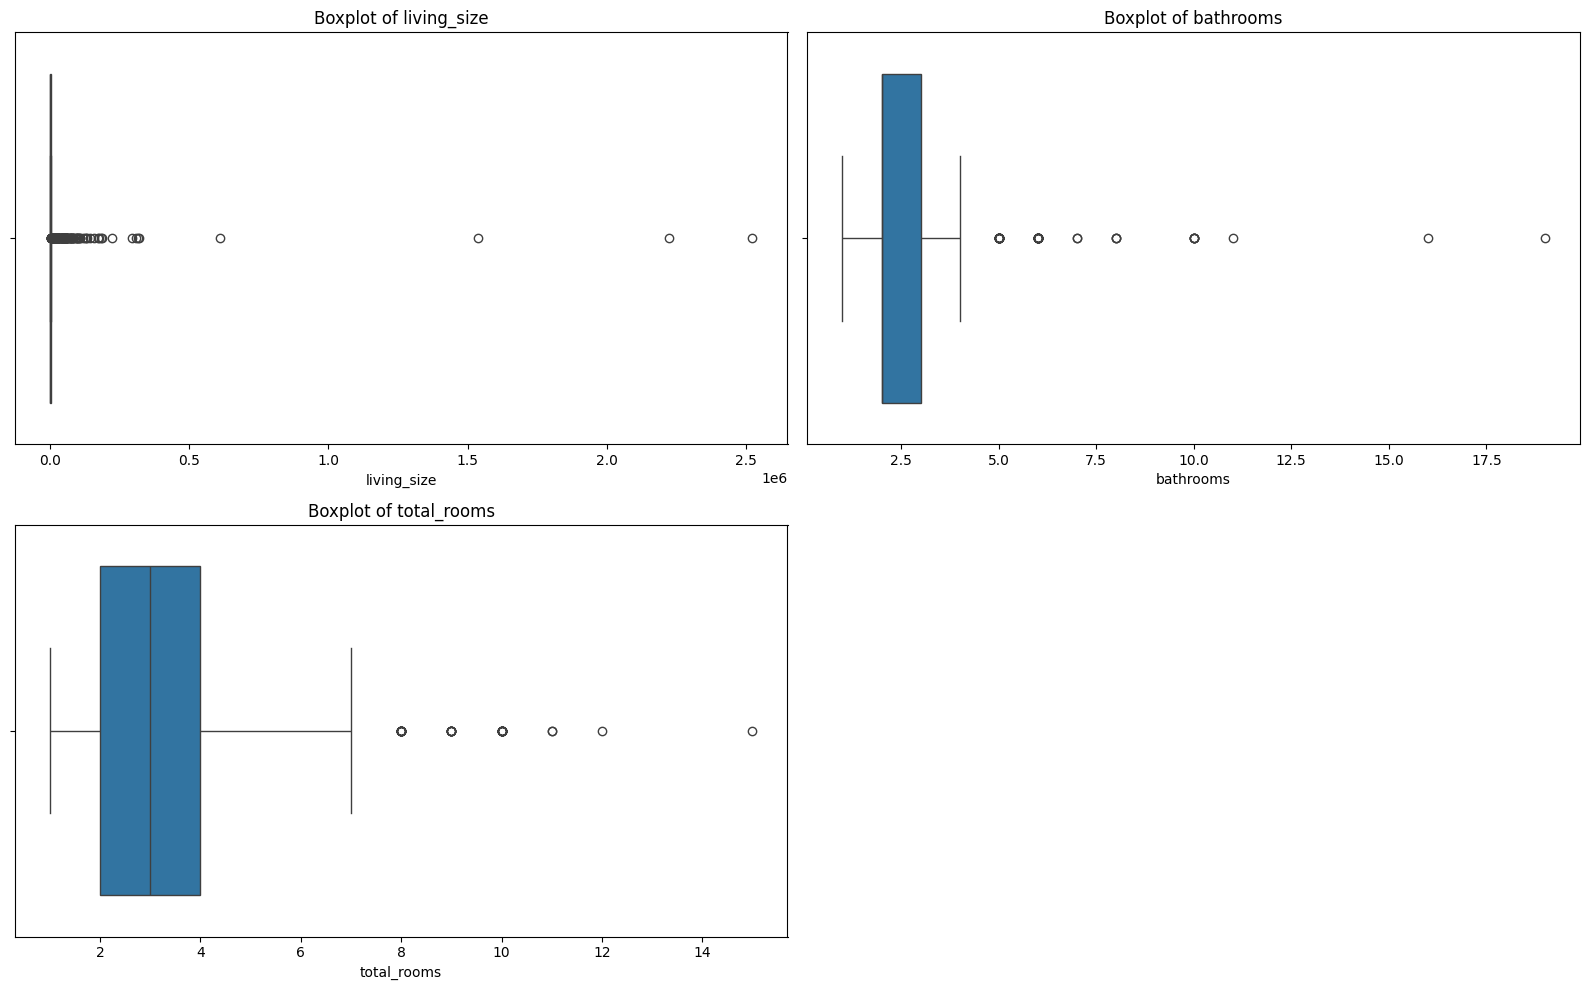

In [641]:
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols[:-1], 1):  # exclude sale_price here if you want
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_merged[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

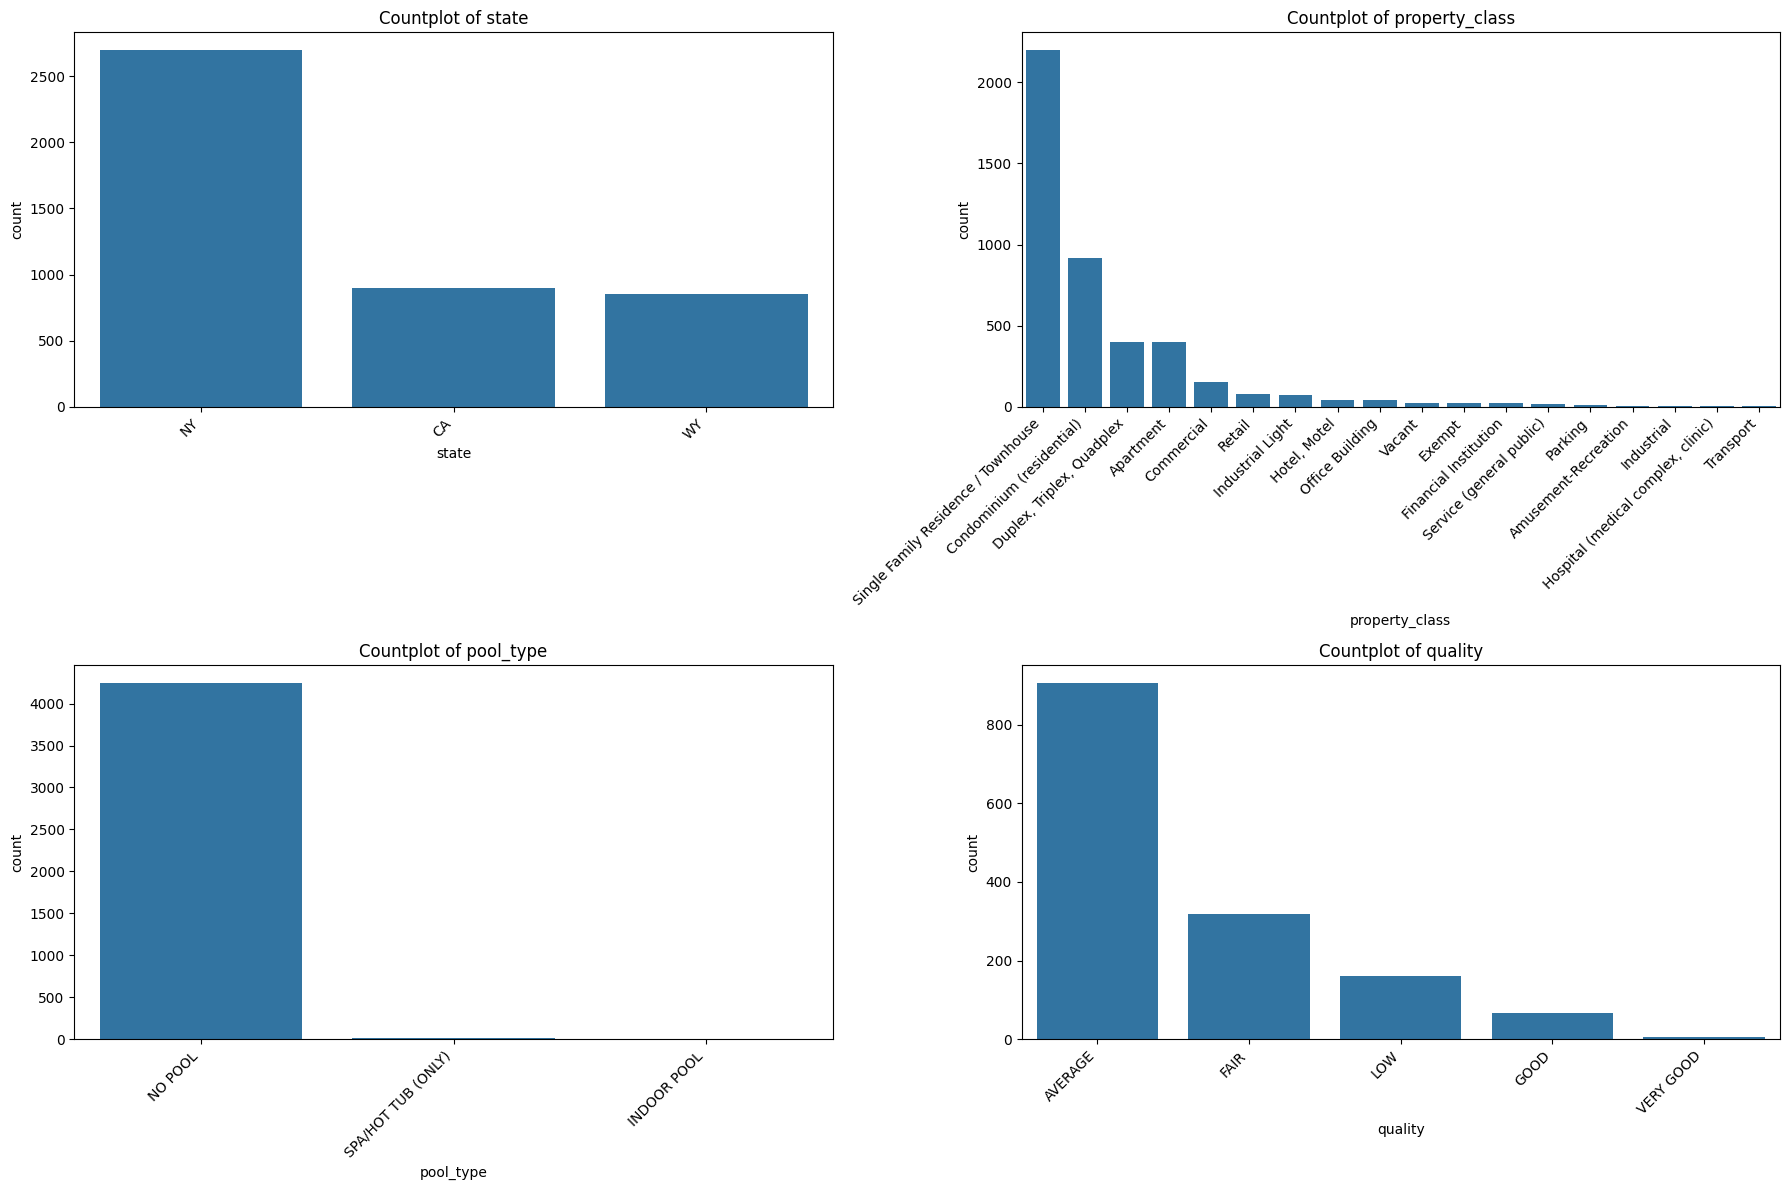

In [642]:
cat_cols = ['state', 'property_class', 'pool_type', 'quality']

plt.figure(figsize=(18,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_merged, x=col, order=df_merged[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


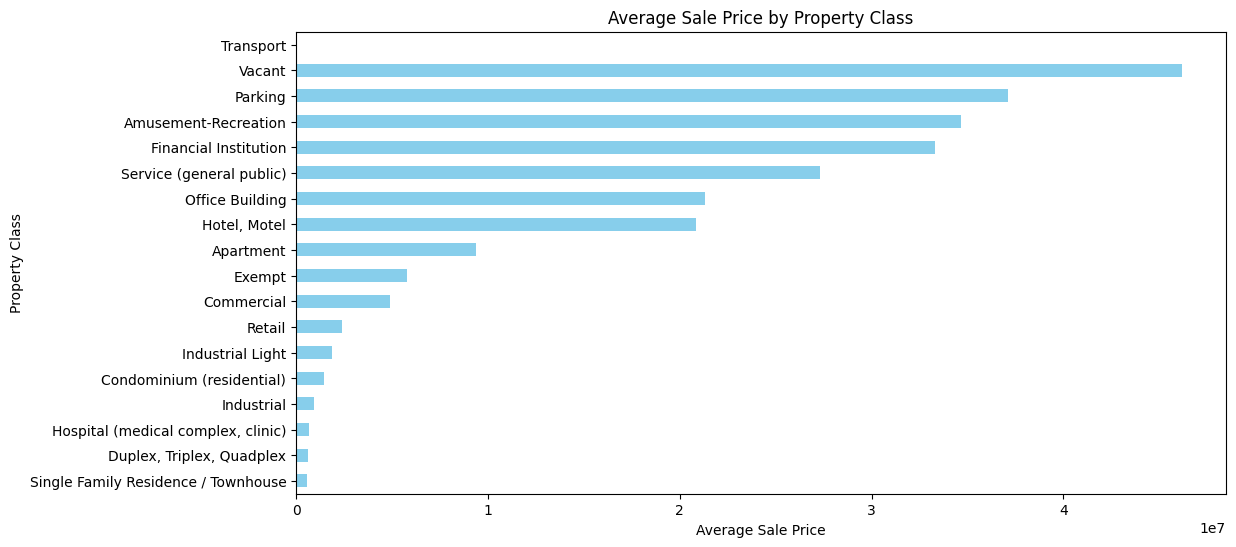

In [649]:
avg_price_by_class = df_merged.groupby('property_class')['sale_price'].mean().sort_values()

# Plot
plt.figure(figsize=(12,6))
avg_price_by_class.plot(kind='barh', color='skyblue')
plt.title('Average Sale Price by Property Class')
plt.xlabel('Average Sale Price')
plt.ylabel('Property Class')
plt.show()

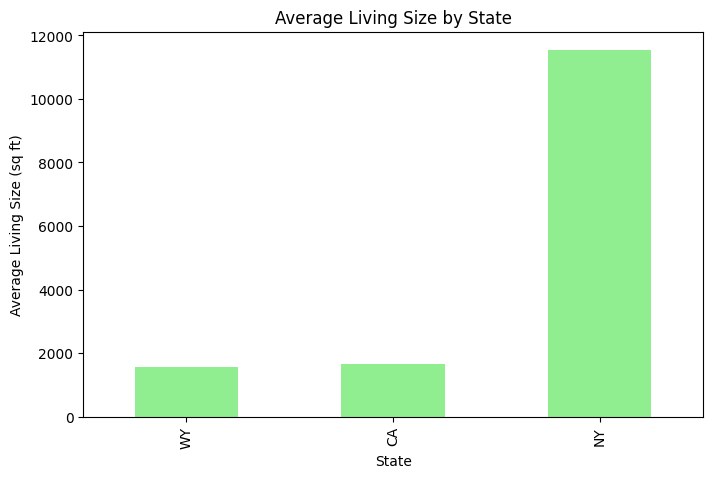

In [650]:
avg_size_by_state = df_merged.groupby('state')['living_size'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_size_by_state.plot(kind='bar', color='lightgreen')
plt.title('Average Living Size by State')
plt.ylabel('Average Living Size (sq ft)')
plt.xlabel('State')
plt.show()


              sale_price  bathrooms
quality                            
LOW        235532.398305   2.050955
FAIR       254816.599156   2.383648
AVERAGE    316292.966171   2.228409
GOOD       516311.553191   4.257576
VERY GOOD  542913.800000   3.500000


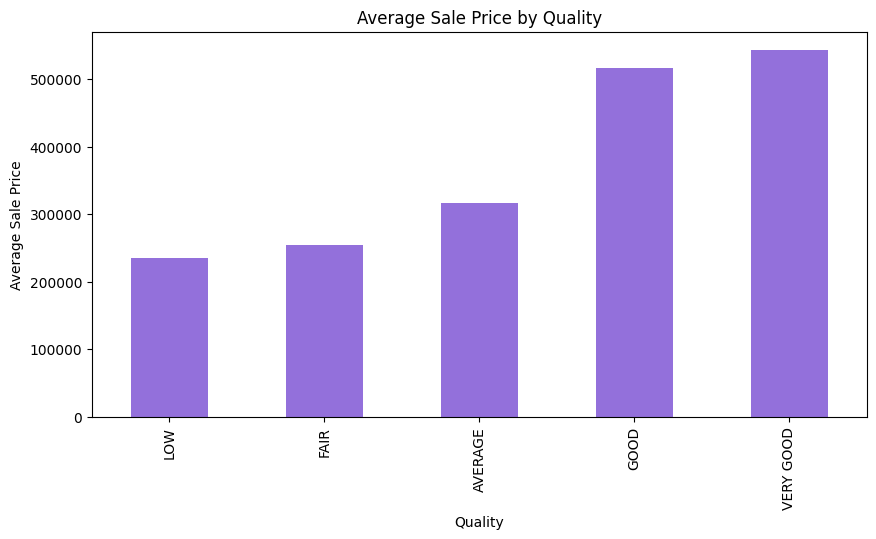

In [652]:
group_quality = df_merged.groupby('quality').agg({
    'sale_price': 'mean',
    'bathrooms': 'mean'
}).sort_values('sale_price')

print(group_quality)

# Plot sale price by quality
plt.figure(figsize=(10,5))
group_quality['sale_price'].plot(kind='bar', color='mediumpurple')
plt.title('Average Sale Price by Quality')
plt.ylabel('Average Sale Price')
plt.xlabel('Quality')
plt.show()


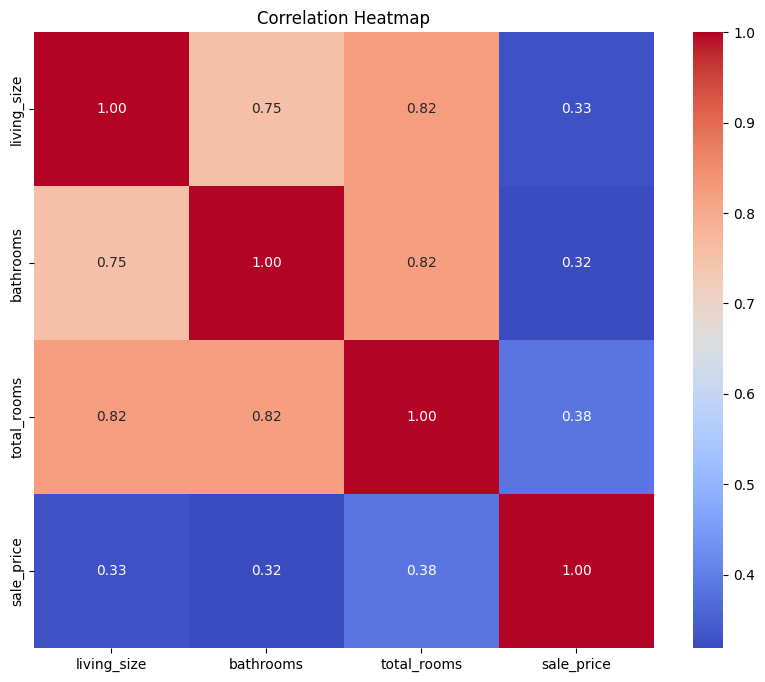

In [643]:
plt.figure(figsize=(10, 8))
corr = df_merged[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Feature Engineering

## drop column

In [535]:
#drop id column and parking_spaces
df_clean = df_merged.drop(columns=['id', 'parking_spaces'])    

In [536]:
# drop rows with missing sale_price (target)
df_clean = df_clean.dropna(subset=['sale_price'])

## drop rows 

In [537]:
# deop all the row that has all null
df_cleaned = df.dropna(how='all')

In [538]:
#drop any colum that has 4 or more 
df = df.dropna(thresh=8)

# Fill missing values

In [539]:
# fill any null with NO POOL 
df_clean['pool_type'].fillna('NO POOL', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_30652\2698324465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['pool_type'].fillna('NO POOL', inplace=True)


In [540]:
# fill any null with the most value repeted 
df_clean['property_class'].fillna(df_clean['property_class'].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_30652\2680158604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['property_class'].fillna(df_clean['property_class'].mode()[0], inplace=True)


In [541]:
df_clean['living_size'].median()
#df_clean['living_size'].fillna(df_clean['living_size'].median(), inplace=True)

np.float64(1406.0)

In [542]:
#df_clean['bathrooms'].median() #-->2
df_clean['bathrooms'].fillna(df_clean['bathrooms'].median(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_30652\4215460761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bathrooms'].fillna(df_clean['bathrooms'].median(), inplace=True)


In [543]:
#df_clean['quality'].mode()[0]#-->AVERAGE
#df_clean['quality'].fillna(df_clean['quality'].mode()[0], inplace=True)


In [544]:
df_clean.isnull().sum()
# we left with living_size, total_rooms and quality
# which i will handel leter 
# living_size, total_rooms will be handel bas on ==property_class  
# quality will be handel base on ==sale_price           

state                0
property_class       0
living_size        871
bathrooms            0
total_rooms       2789
pool_type            0
quality           2363
sale_price           0
dtype: int64

In [545]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 4446
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           3509 non-null   object 
 1   property_class  3509 non-null   object 
 2   living_size     2638 non-null   float64
 3   bathrooms       3509 non-null   float64
 4   total_rooms     720 non-null    float64
 5   pool_type       3509 non-null   object 
 6   quality         1146 non-null   object 
 7   sale_price      3509 non-null   float64
dtypes: float64(4), object(4)
memory usage: 246.7+ KB


### fill living_size   &   total_rooms  base on property_class  

#### total_rooms

In [551]:


# One-hot encode property_class first
df_encoded = pd.get_dummies(df_clean, columns=['property_class'])

# Initialize imputer (using 5 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)
df_encoded[['total_rooms']] = imputer.fit_transform(df_encoded[['total_rooms']])

# Assign back to original dataframe and convert it to int 
df_clean['total_rooms'] = df_encoded['total_rooms'].round().astype(int)

In [552]:
print("\nValue counts after imputation:")
print(df_clean['total_rooms'].value_counts().sort_index())


Value counts after imputation:
total_rooms
1       17
2      200
3      215
4     2942
5       43
6       41
7       12
8       14
9        7
10      15
11       2
12       1
Name: count, dtype: int64


#### living_size

In [562]:
from sklearn.impute import KNNImputer
import pandas as pd

# Make a copy of the dataframe to preserve original data
df_encoded = df_clean.copy()

# One-hot encode the categorical variable (property_class)
df_encoded = pd.get_dummies(df_encoded, columns=['property_class'])

# Initialize KNNImputer (5 neighbors works well for most cases)
imputer = KNNImputer(n_neighbors=5)

# Apply imputation to living_size
df_encoded[['living_size']] = imputer.fit_transform(df_encoded[['living_size']])

# Assign back to original dataframe
df_clean['living_size'] = df_encoded['living_size']

# Verify no missing values remain
print("Remaining missing values in living_size:", df_clean['living_size'].isna().sum())

Remaining missing values in living_size: 0


In [563]:
print("\nValue counts after imputation:")
print(df_clean['living_size'].value_counts().sort_index())


Value counts after imputation:
living_size
192.0        5
232.0        3
250.0        4
300.0        3
302.0        1
            ..
185831.0     1
293978.0     1
1538210.0    1
2221336.0    1
2521850.0    1
Name: count, Length: 1495, dtype: int64


In [564]:
df_clean.isnull().sum()

property_class    0
living_size       0
bathrooms         0
total_rooms       0
pool_type         0
quality           0
sale_price        0
state_CA          0
state_NY          0
state_WY          0
dtype: int64

##  Encode categorical

### state col

In [546]:
df_clean.state.unique()

array(['NY', 'CA', 'WY'], dtype=object)

In [547]:
#one hot Encode
df_clean = pd.get_dummies(df_clean, columns=['state'], prefix='state')

### property_class col

In [548]:
df_clean.property_class.unique()

array(['Condominium (residential)', 'Apartment',
       'Single Family Residence / Townhouse', 'Office Building',
       'Hotel, Motel', 'Duplex, Triplex, Quadplex', 'Commercial',
       'Parking', 'Amusement-Recreation', 'Industrial Light', 'Vacant',
       'Financial Institution', 'Retail', 'Exempt', 'Industrial',
       'Service (general public)', 'Hospital (medical complex, clinic)'],
      dtype=object)

In [549]:
# Define the complete mapping based on your exact values
property_mapping = {
    # Residential categories
    'Condominium (residential)': 'Residential',
    'Apartment': 'Residential',
    'Single Family Residence / Townhouse': 'Residential',
    'Duplex, Triplex, Quadplex': 'Residential',
    
    # Commercial categories
    'Commercial': 'Commercial',
    'Office Building': 'Commercial',
    'Retail': 'Commercial',
    'Financial Institution': 'Commercial',
    
    # Industrial categories
    'Industrial': 'Industrial',
    'Industrial Light': 'Industrial',
    
    # Hospitality
    'Hotel, Motel': 'Hospitality',
    
    # Institutional
    'Hospital (medical complex, clinic)': 'Institutional',
    
    # Service
    'Service (general public)': 'Service',
    
    # Special Purpose
    'Parking': 'Special Purpose',
    'Amusement-Recreation': 'Special Purpose',
    'Vacant': 'Special Purpose',
    'Exempt': 'Special Purpose'
}


df_clean['property_class'] = df_clean['property_class'].map(property_mapping)

print(df_clean['property_class'].value_counts())

property_class
Residential        3209
Commercial          176
Industrial           56
Special Purpose      30
Hospitality          26
Service              10
Institutional         2
Name: count, dtype: int64


In [566]:
# One-hot encode
df_clean = pd.get_dummies(df_clean, columns=['property_class'], prefix='prop', drop_first=True)

### pool_type col

In [568]:
df_clean.pool_type.unique()

array(['NO POOL', 'SPA/HOT TUB (ONLY)'], dtype=object)

In [569]:
df_clean['pool_type'] = df_clean['pool_type'].map({'NO POOL': False, 'SPA/HOT TUB (ONLY)': True})

### quality col

In [554]:
df_clean.quality.unique()

array([nan, 'AVERAGE', 'GOOD', 'FAIR', 'LOW', 'VERY GOOD'], dtype=object)

In [555]:
quality_order = ['LOW', 'FAIR', 'AVERAGE', 'GOOD', 'VERY GOOD']
mapping = {k: v for v, k in enumerate(quality_order)}

# {'LOW': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'VERY GOOD': 4}

df_clean['quality'] = df_clean['quality'].map(mapping)

In [556]:
median_prices = df_clean.groupby('quality')['sale_price'].median().sort_index()
print(median_prices)

quality
0.0    224912.0
1.0    241045.0
2.0    286901.0
3.0    463938.0
4.0    521250.0
Name: sale_price, dtype: float64


In [557]:
price_thresholds = {
    0: (-np.inf, 224912),         # LOW
    1: (224912, 241045),          # FAIR
    2: (241045, 286901),         # AVERAGE
    3: (286901, 463938),         # GOOD
    4: (463938, np.inf)          # VERY GOOD
}

def assign_quality(row):
    if pd.isna(row['quality']):
        for q, (low, high) in price_thresholds.items():
            if low <= row['sale_price'] < high:
                return q
    return row['quality']

In [558]:

df_clean['quality'] = df_clean.apply(assign_quality, axis=1)

In [570]:
df_clean. info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 4446
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   living_size           3509 non-null   float64
 1   bathrooms             3509 non-null   float64
 2   total_rooms           3509 non-null   int64  
 3   pool_type             3509 non-null   bool   
 4   quality               3509 non-null   float64
 5   sale_price            3509 non-null   float64
 6   state_CA              3509 non-null   bool   
 7   state_NY              3509 non-null   bool   
 8   state_WY              3509 non-null   bool   
 9   prop_Hospitality      3509 non-null   bool   
 10  prop_Industrial       3509 non-null   bool   
 11  prop_Institutional    3509 non-null   bool   
 12  prop_Residential      3509 non-null   bool   
 13  prop_Service          3509 non-null   bool   
 14  prop_Special Purpose  3509 non-null   bool   
dtypes: bool(10), float64(4), i

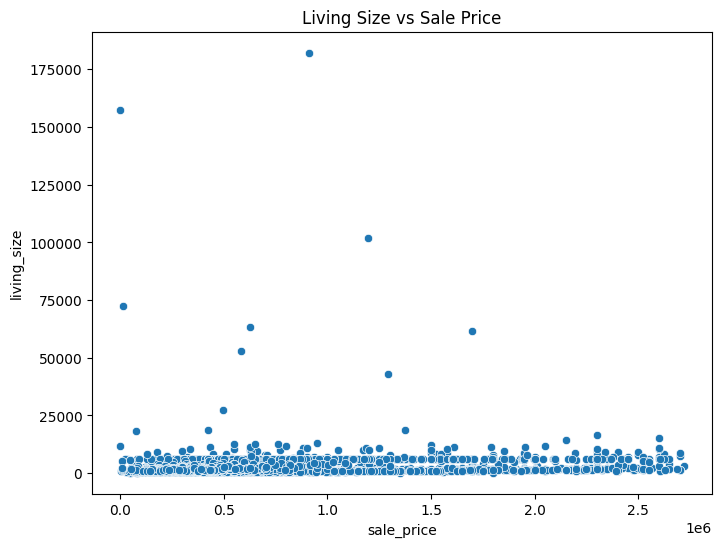

In [646]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean,  x='sale_price',y='living_size')
plt.title('Living Size vs Sale Price')
plt.show()


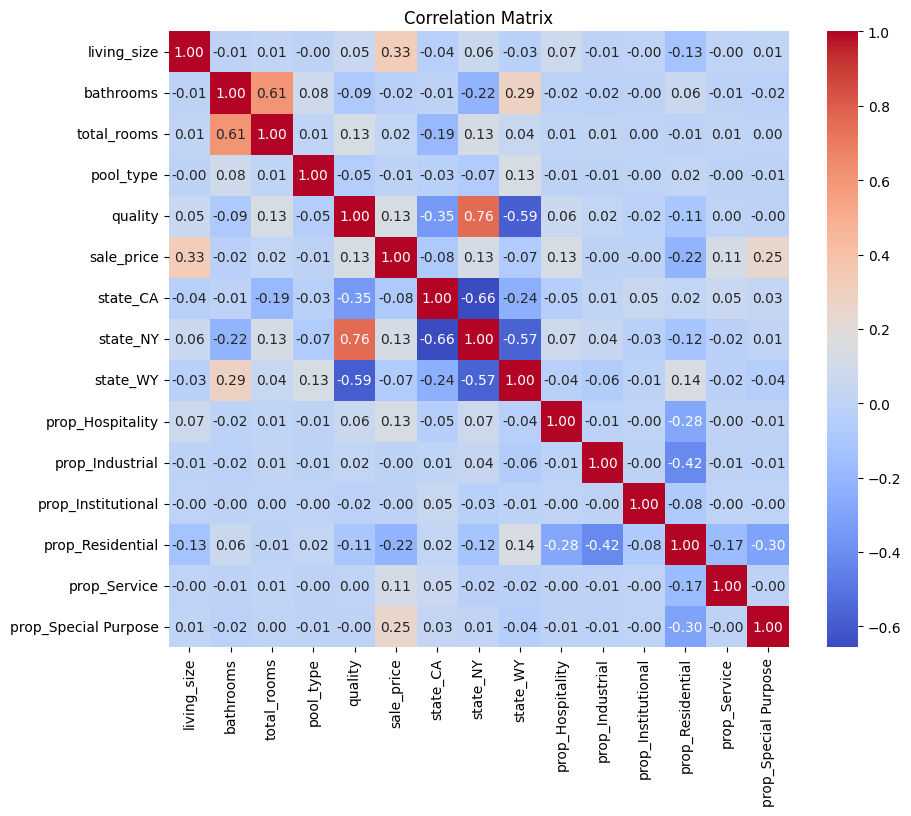

In [572]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


<Axes: >

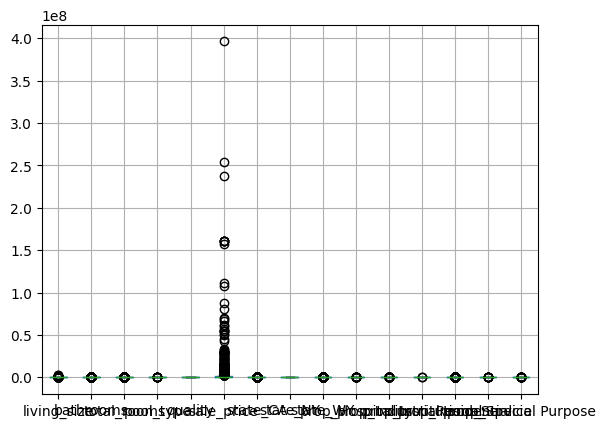

In [582]:
df_clean.boxplot()

##  Removing Outliers from the Price Column

### using IQR Method
if data is belw LL and above UL thein it is outlier

<Axes: >

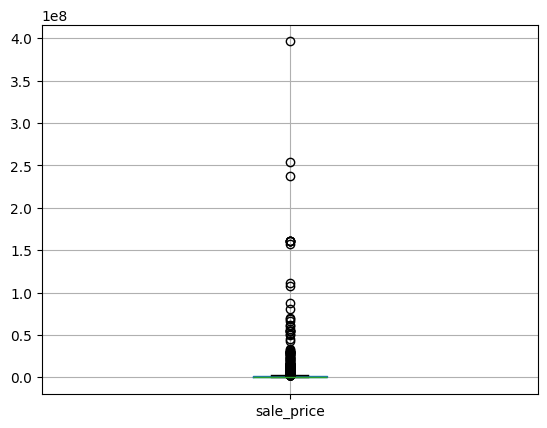

In [583]:
df_clean.boxplot('sale_price')

In [586]:
Q1 = df_clean['sale_price'].quantile(0.25)
Q3 = df_clean['sale_price'].quantile(0.75)
IQR = Q3 - Q1

ll = Q1 - 1.5 * IQR
ul = Q3 + 1.5 * IQR

# Filter df_clean itself
df_clean = df_clean[(df_clean['sale_price'] >= ll) & (df_clean['sale_price'] <= ul)]


<Axes: >

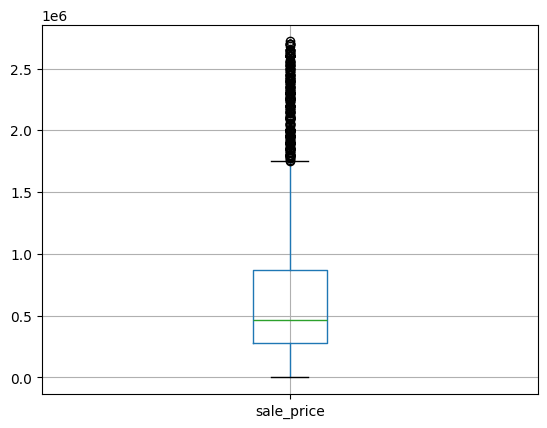

In [587]:
df_clean.boxplot('sale_price')

# ML

In [602]:
X = df_clean.drop('sale_price', axis=1)
y = df_clean['sale_price']

In [603]:
# Split data
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [604]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression

In [626]:
# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [627]:
# Predict
y_pred = model.predict(X_test_scaled)

In [628]:
#Evaluate the model (metrics explained)
mae_l = mean_absolute_error(y_test, y_pred)
mse_l = mean_squared_error(y_test, y_pred)
rmse_l = np.sqrt(mse_l)
r2_l = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae_l:.2f}")
print(f"Mean Squared Error (MSE): {mse_l:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_l:.2f}")
print(f"R-squared (R2): {r2_l:.2f}")

--- Linear Regression Results ---
Mean Absolute Error (MAE): 318572.89
Mean Squared Error (MSE): 205832791205.01
Root Mean Squared Error (RMSE): 453687.99
R-squared (R2): 0.46


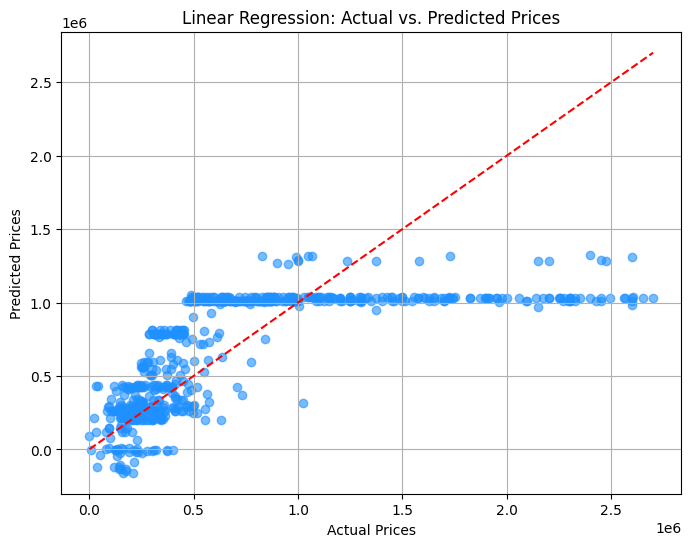

In [629]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.grid(True)
plt.show()

##  Polynomial Regression

In [633]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

In [634]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\n--- Polynomial Regression Results (Degree 2) ---")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"R-squared (R2): {r2_poly:.2f}")


--- Polynomial Regression Results (Degree 2) ---
Mean Absolute Error (MAE): 287418.03
Mean Squared Error (MSE): 182056397793.93
Root Mean Squared Error (RMSE): 426680.67
R-squared (R2): 0.52


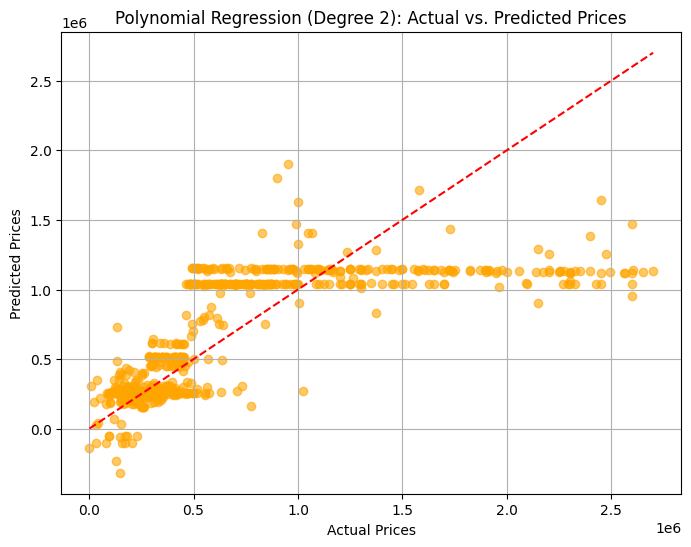

In [635]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Polynomial Regression (Degree 2): Actual vs. Predicted Prices')
plt.grid(True)
plt.show()


## Lasso Regression

In [623]:
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- Lasso Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")



--- Lasso Regression Results ---
Mean Absolute Error (MAE): 318572.50
Mean Squared Error (MSE): 205832726430.76
Root Mean Squared Error (RMSE): 453687.92
R-squared (R2): 0.46


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.099e+12, tolerance: 7.930e+10
  model = cd_fast.enet_coordinate_descent(


## Ridge Regression

In [618]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")



--- Ridge Regression Results ---
Mean Absolute Error (MAE): 318245.21
Mean Squared Error (MSE): 205568440469.69
Root Mean Squared Error (RMSE): 453396.56
R-squared (R2): 0.46


## Decision Tree Regressor

In [619]:
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\n--- Decision Tree Regressor Results ---")
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"R-squared (R2): {r2_tree:.2f}")



--- Decision Tree Regressor Results ---
Mean Absolute Error (MAE): 230005.30
Mean Squared Error (MSE): 146494613796.88
Root Mean Squared Error (RMSE): 382746.15
R-squared (R2): 0.62


## Random Forest Regressor

In [620]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Results ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")



--- Random Forest Regressor Results ---
Mean Absolute Error (MAE): 210530.08
Mean Squared Error (MSE): 122833696385.89
Root Mean Squared Error (RMSE): 350476.38
R-squared (R2): 0.68


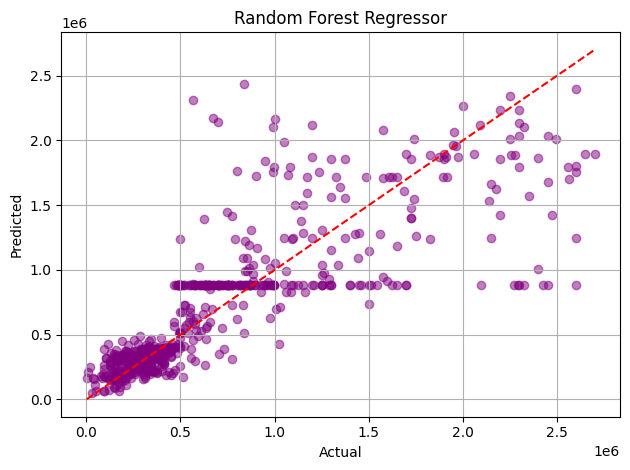

In [637]:
# Random Forest Regressor Plot

plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest Regressor")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

# Display all plots
plt.tight_layout()
plt.show()

## SVM Regressor

In [621]:
# Scale the data for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

model_svr = SVR(kernel='rbf')
model_svr.fit(X_train_scaled, y_train_scaled)
y_pred_svr_scaled = model_svr.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\n--- Support Vector Regression (SVR) Results ---")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")



--- Support Vector Regression (SVR) Results ---
Mean Absolute Error (MAE): 261829.59
Mean Squared Error (MSE): 201905799906.67
Root Mean Squared Error (RMSE): 449339.29
R-squared (R2): 0.47


# comparison between regression models

In [622]:
print(f"Linear Regression model R-squared (R2): {r2_l:.2f}")
print(f"Polynomial Regression R-squared (R2): {r2_poly:.2f}")
print(f"Lasso Regression R-squared (R2): {r2_lasso:.2f}")
print(f" Ridge Regression R-squared (R2): {r2_ridge:.2f}")
print(f"Decision Tree Regressor R-squared (R2): {r2_tree:.2f}")
print(f" Random Forest Regressor R-squared (R2): {r2_rf:.2f}")
print(f" SVM Regressor R-squared (R2): {r2_svr:.2f}")

Linear Regression model R-squared (R2): 0.46
Polynomial Regression R-squared (R2): 0.52
Lasso Regression R-squared (R2): 0.46
 Ridge Regression R-squared (R2): 0.46
Decision Tree Regressor R-squared (R2): 0.62
 Random Forest Regressor R-squared (R2): 0.68
 SVM Regressor R-squared (R2): 0.47


In [ ]:
#I chose the Random Forest Regressor as the final model for the following reasons
#Highest R² Score (0.68)
#